# Decision Tree Classifier - Credit History

In [2]:
# Importing all standard libraries
import os 
import pandas as pd
import pydotplus

In [4]:
#Setting the default directory
os.chdir("/Users/alokkumar/Desktop/Python For ML")

In [6]:
# Reading the dataset and displaying it
data = pd.read_csv("credit_history.csv")
data.head(5)

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [7]:
#Sanity check of the columns
data.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [8]:
#checking the distribution of the Year column in the dataset before substituting the missing value
data['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [11]:
#Replacing the missing value with the median value i.e 4 
data['years'].fillna(4,inplace = True)

In [12]:
data.isnull().sum()

default      0
amount       0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

In [15]:
# Creating the Predictor matrix i.e predicting the reason for defaulters based on default column
X = data.drop('default',axis=1)

In [18]:
X.head(5)

,amount,grade,years,ownership,income,age
0,1000,B,4,RENT,19200.0,24
1,6500,A,4,MORTGAGE,66000.0,28
2,2400,A,4,RENT,60000.0,36
3,10000,C,4,RENT,62000.0,24
4,4000,C,4,RENT,20000.0,28


In [19]:
# Onehot encoding for non numeric columns value
X = pd.get_dummies(X)

In [20]:
X.head(5)

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,4,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,4,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,4,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,4,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,4,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [21]:
# Target Predictor for storing default values
y = data['default']

In [27]:
# Testing and Training dataset split
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2,random_state = 200)

In [28]:
# Decision Tree Classifier Model 
import sklearn.tree as tree
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 200)

In [29]:
# Training the model
clf.fit(X_train,y_train)
# Scores for the Test set 
clf.score(X_test,y_test)

0.6274256144890039

In [31]:
#Computing performance metrics Area under Curve
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.6721250820352787

In [32]:
#Visualisation of Decison Tree Classifier 
dot_data = tree.export_graphviz(clf,out_file=None,
                                feature_names = X.columns,
                                class_names=['0','1'], # Classes means Target variables(in this case default column)
                                filled = True, rounded = True,
                                special_characters = True, proportion = True)

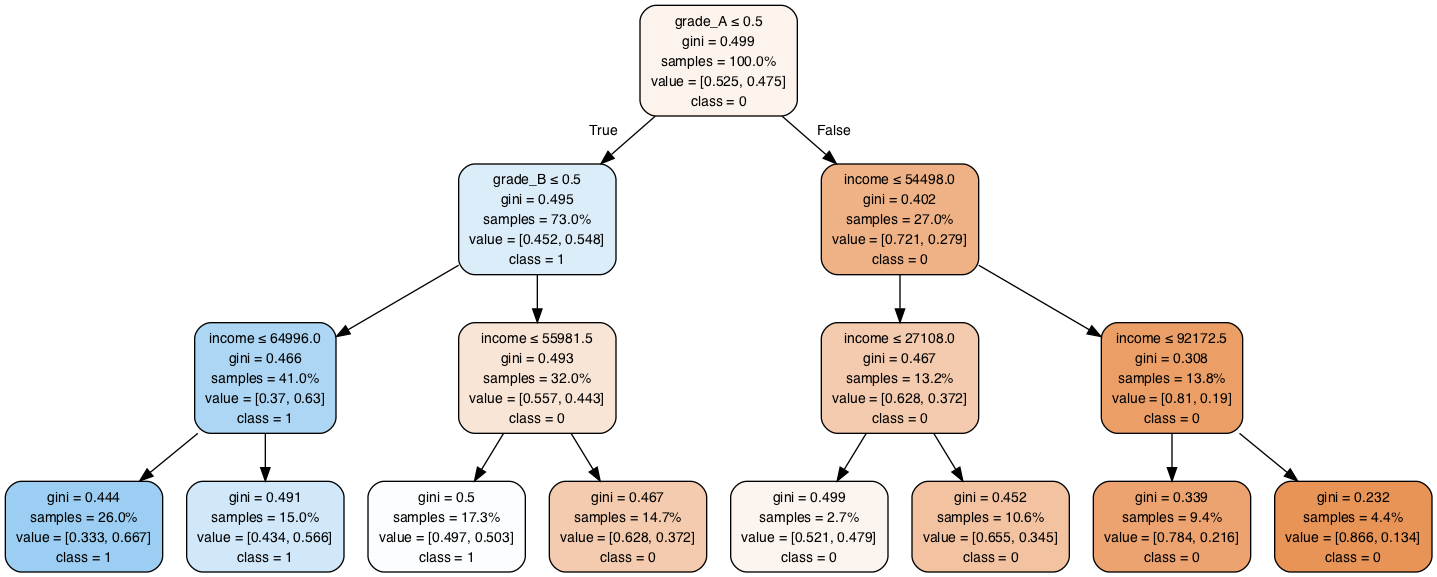

In [34]:
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())

In [37]:
# Performance Tuning of the model
# Grid Search Cross Validation
clf = tree.DecisionTreeClassifier(max_depth = 3,random_state = 200)
mod = model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)
mod.best_estimator_
mod.best_score_

0.6314512214851966